### Gaussian Mixture Models <br/>
GMM can be used to cluster unlabeled data similar to K-means. <br/>
advantages of gaussian mixture models over k-means is , k-means does not account for variance <br/>
GMMs handle data (clusters) of any shape




In [25]:
# pip install plotnine

In [52]:
%%time
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from plotnine import *
import seaborn as sns


Wall time: 996 µs


In [54]:
data = load_iris()

In [55]:
df = pd.DataFrame(data=data.data,columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [58]:
#df['y_predicted'].unique()

In [51]:
#df['target'] = data.target
#df

In [66]:
k_range = (1,20) 
# df = df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
models = [ GaussianMixture(n_components=k, covariance_type='diag').fit(df) for k in k_range ]

Given a model, we can use one of several means to evaluate how well it fits the data. For example, <br/>
there is the Aikaki Information Criterion (AIC) and the Bayesian Information Criterion (BIC) <br/>

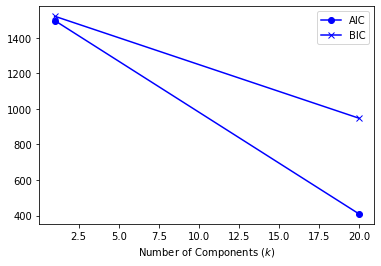

In [67]:
# Compute metrics to determine best hyperparameter

AIC = [m.aic(df) for m in models]
BIC = [m.bic(df) for m in models]
# Plot these metrics
plt.plot(k_range, AIC, 'bo-', label='AIC',)
plt.plot(k_range, BIC, 'bx-', label='BIC')
plt.xlabel('Number of Components ($k$)')
plt.legend()


In [68]:
gmm_aic = GaussianMixture(n_components=3)
gmm_aic.fit(df)
y_predicted_aic = gmm_aic.predict(df)

In [76]:
gmm_bic = GaussianMixture(n_components=3)
gmm_bic.fit(df)
y_predicted_bic = gmm_bic.predict(df)
df['y_predicted_bic'] = y_predicted_bic

In [69]:
df['y_predicted_aic'] = y_predicted_aic

In [70]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y_predicted_aic
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [72]:
df['target'] = data.target

In [73]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y_predicted_aic,target
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,2
146,6.3,2.5,5.0,1.9,0,2
147,6.5,3.0,5.2,2.0,0,2
148,6.2,3.4,5.4,2.3,0,2


In [74]:
# Compute confusion matrix for AIC
from sklearn.metrics import confusion_matrix,accuracy_score
cm_aic = confusion_matrix(df['target'], df['y_predicted_aic'])
cm_aic


array([[ 0, 50,  0],
       [ 5,  0, 45],
       [50,  0,  0]], dtype=int64)

In [75]:
print(accuracy_score(df['target'], df['y_predicted_aic']))

0.0


In [77]:
df['y_predicted_bic'] = y_predicted_bic
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y_predicted_aic,target,y_predicted_bic
0,5.1,3.5,1.4,0.2,1,0,1
1,4.9,3.0,1.4,0.2,1,0,1
2,4.7,3.2,1.3,0.2,1,0,1
3,4.6,3.1,1.5,0.2,1,0,1
4,5.0,3.6,1.4,0.2,1,0,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,2,2
146,6.3,2.5,5.0,1.9,0,2,2
147,6.5,3.0,5.2,2.0,0,2,2
148,6.2,3.4,5.4,2.3,0,2,2


In [78]:
# Compute confusion matrix for BIC
from sklearn.metrics import confusion_matrix,accuracy_score
cm_bic = confusion_matrix(df['target'], df['y_predicted_bic'])
cm_bic

array([[ 0, 50,  0],
       [45,  0,  5],
       [ 0,  0, 50]], dtype=int64)

In [79]:
print(accuracy_score(df['target'], df['y_predicted_bic']))

0.3333333333333333
